<a href="https://colab.research.google.com/github/am5nj/Hotel-reservations-/blob/main/hotel_reservtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Load the Hotel Dataset
url = 'https://raw.githubusercontent.com/am5nj/Hotel-reservations-/main/Hotel.csv'
mydata = pd.read_csv(url)
mydata




,Booking_ID,no_of_adults,no_of_children,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,avg_price_per_room,booking_status
0,INN00001,2,0,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,65.00,Not_Canceled
1,INN00002,2,0,Not Selected,0,Room_Type 1,5,2018,11,6,Online,106.68,Not_Canceled
2,INN00003,1,0,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,60.00,Canceled
3,INN00004,2,0,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,100.00,Canceled
4,INN00005,2,0,Not Selected,0,Room_Type 1,48,2018,4,11,Online,94.50,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,INN01995,2,0,Not Selected,0,Room_Type 1,53,2018,10,17,Online,108.00,Not_Canceled
1995,INN01996,2,0,Meal Plan 1,0,Room_Type 1,37,2018,10,13,Offline,105.00,Not_Canceled
1996,INN01997,2,0,Meal Plan 1,0,Room_Type 1,302,2018,9,16,Online,100.00,Canceled
1997,INN01998,2,0,Meal Plan 1,0,Room_Type 1,229,2018,10,22,Online,89.25,Canceled


In [7]:
pd.crosstab(mydata['Booking_ID'],mydata['booking_status'] )

booking_status,Canceled,Not_Canceled
Booking_ID,,
INN00001,0,1
INN00002,0,1
INN00003,1,0
INN00004,1,0
INN00005,1,0
...,...,...
INN01995,0,1
INN01996,0,1
INN01997,1,0


<Axes: xlabel='booking_status', ylabel='lead_time'>

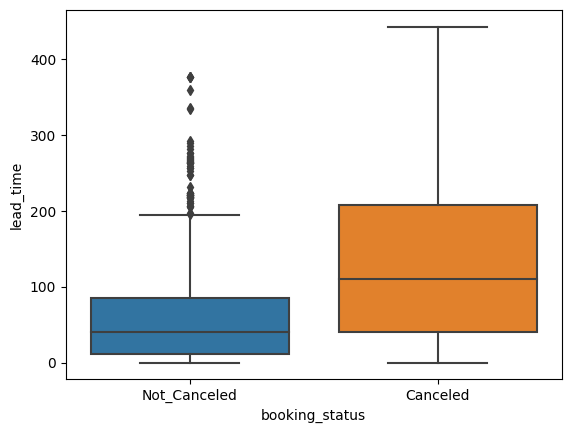

In [9]:
sns.boxplot(x="booking_status", y="lead_time", data=mydata)

<Axes: xlabel='market_segment_type', ylabel='count'>

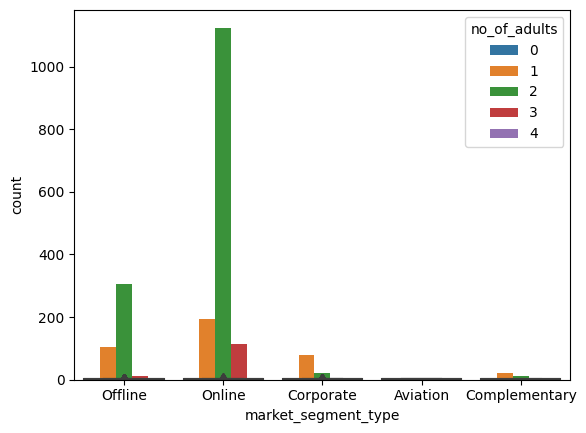

In [3]:
sns.boxplot(x="market_segment_type", y="no_of_adults", data=mydata)

pd.crosstab(mydata['market_segment_type'],mydata['no_of_adults'] )
sns.countplot(x="market_segment_type", hue="no_of_adults", data=mydata)

In [5]:
pd.pivot_table(mydata,'arrival_date', index=['arrival_year', 'arrival_month'],
                     columns=[ 'avg_price_per_room'])

avg_price_per_room             0.00    1.00    2.00    6.00    6.50    6.67    \
arrival_year arrival_month                                                      
2017         7                    NaN     NaN     NaN     NaN     NaN     NaN   
             8              15.750000     NaN     NaN     NaN     NaN     NaN   
             9              10.000000     NaN     NaN     NaN     NaN     NaN   
             10             10.333333     NaN     NaN     NaN     NaN     NaN   
             11             30.000000     NaN     NaN     NaN     NaN     NaN   
             12             15.250000     NaN     NaN     NaN     NaN     NaN   
2018         1              23.500000     2.0     NaN     NaN     NaN    14.0   
             2              21.000000     NaN    26.0     NaN    28.0     NaN   
             3              21.000000     8.0     NaN    25.0     NaN     NaN   
             4              12.000000     NaN     NaN     NaN     NaN     NaN   
             5              15.000000     NaN     NaN     NaN     NaN     NaN   
             6              13.250000     NaN     NaN     NaN     NaN     NaN   
             7               5.000000     NaN     NaN     NaN     NaN     NaN   
             8              19.500000     NaN     NaN     NaN     NaN     NaN   
             9              18.000000     NaN     NaN     NaN     NaN     NaN   
             10             13.500000     NaN     NaN     NaN     NaN     NaN   
             11             19.000000     NaN     NaN     NaN     NaN     NaN   
             12                   NaN     NaN     NaN     NaN     NaN     NaN   

avg_price_per_room          20.00   29.00   37.33   38.67   ...  215.60  \
arrival_year arrival_month                                  ...           
2017         7                 NaN     NaN     7.0     NaN  ...     NaN   
             8                 NaN     NaN     NaN     NaN  ...     NaN   
             9                 NaN     6.0     NaN     NaN  ...     NaN   
             10                NaN     NaN     NaN     NaN  ...     NaN   
             11                NaN     NaN     6.0     NaN  ...     NaN   
             12                NaN     NaN     NaN     NaN  ...     NaN   
2018         1                 NaN     NaN     NaN     NaN  ...     NaN   
             2                 NaN     NaN     NaN     NaN  ...     NaN   
             3                 NaN     NaN     NaN    21.0  ...     NaN   
             4                 NaN     NaN     NaN     NaN  ...     NaN   
             5                 NaN     NaN     NaN     NaN  ...     NaN   
             6                 NaN     NaN     NaN     NaN  ...     NaN   
             7                 NaN     NaN     NaN     NaN  ...     NaN   
             8                 NaN     NaN     NaN     NaN  ...     NaN   
             9                 NaN     NaN     NaN     NaN  ...     NaN   
             10                NaN     NaN     NaN     NaN  ...     7.0   
             11               25.0     NaN     NaN     NaN  ...     NaN   
             12                NaN     NaN     NaN     NaN  ...     NaN   

avg_price_per_room          219.60  221.00  228.60  233.33  239.00  240.00  \
arrival_year arrival_month                                                   
2017         7                 NaN     NaN     NaN     NaN     NaN     NaN   
             8                 NaN     NaN     NaN     NaN     NaN     NaN   
             9                 NaN     NaN     NaN     NaN     NaN     NaN   
             10                NaN     NaN     NaN     NaN     NaN     NaN   
             11                NaN     NaN     NaN     NaN     NaN     NaN   
             12                NaN     NaN     NaN     NaN     NaN     NaN   
2018         1                 NaN     NaN     NaN     NaN     NaN     NaN   
             2                 NaN     NaN     NaN     NaN     NaN     NaN   
             3                 NaN     NaN     NaN     NaN     NaN     NaN   
             4      

<ipython-input-4-5c316afd1bc6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mydata['arrival_date'])
<ipython-input-4-5c316afd1bc6>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = mydata.corr()


<Axes: >

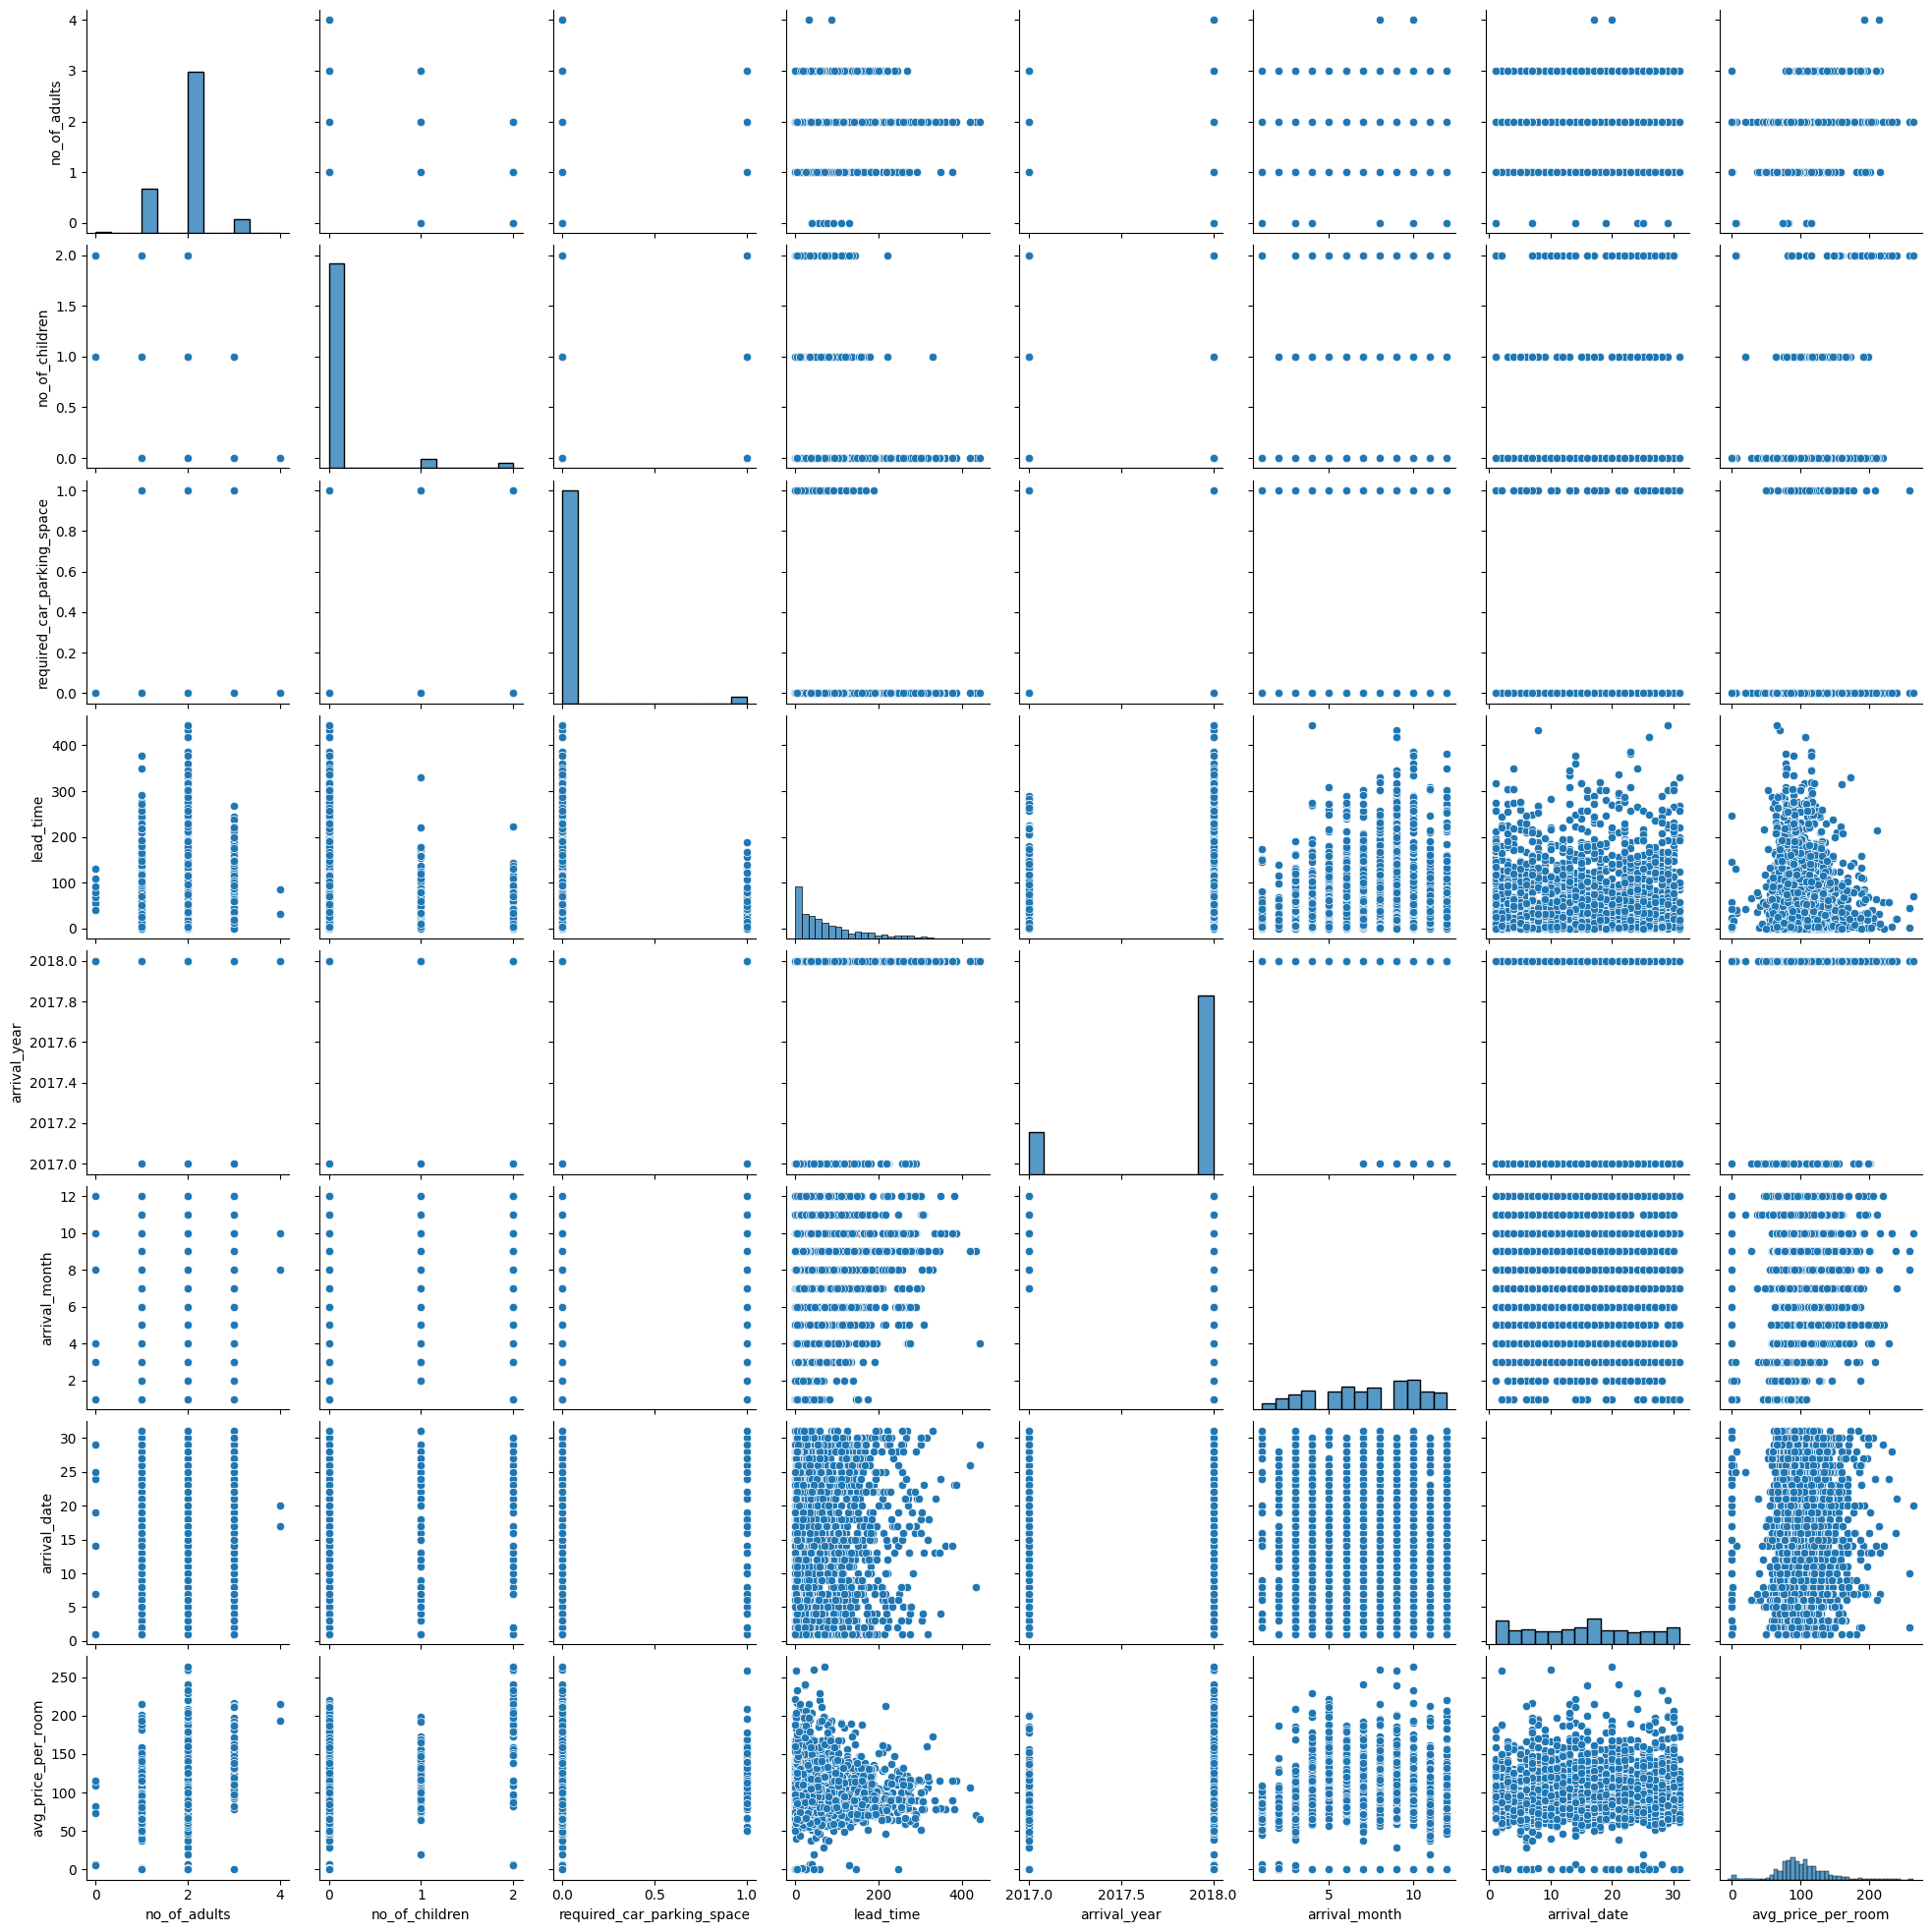

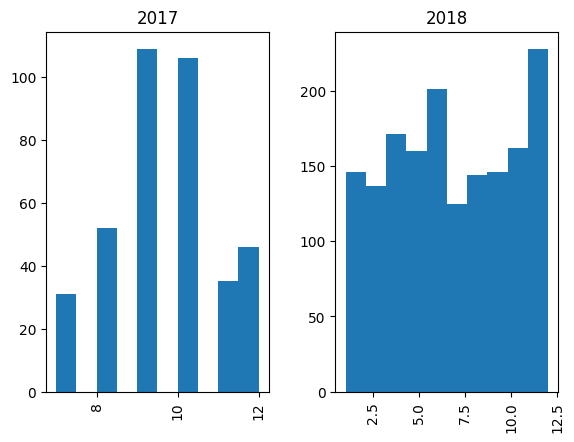

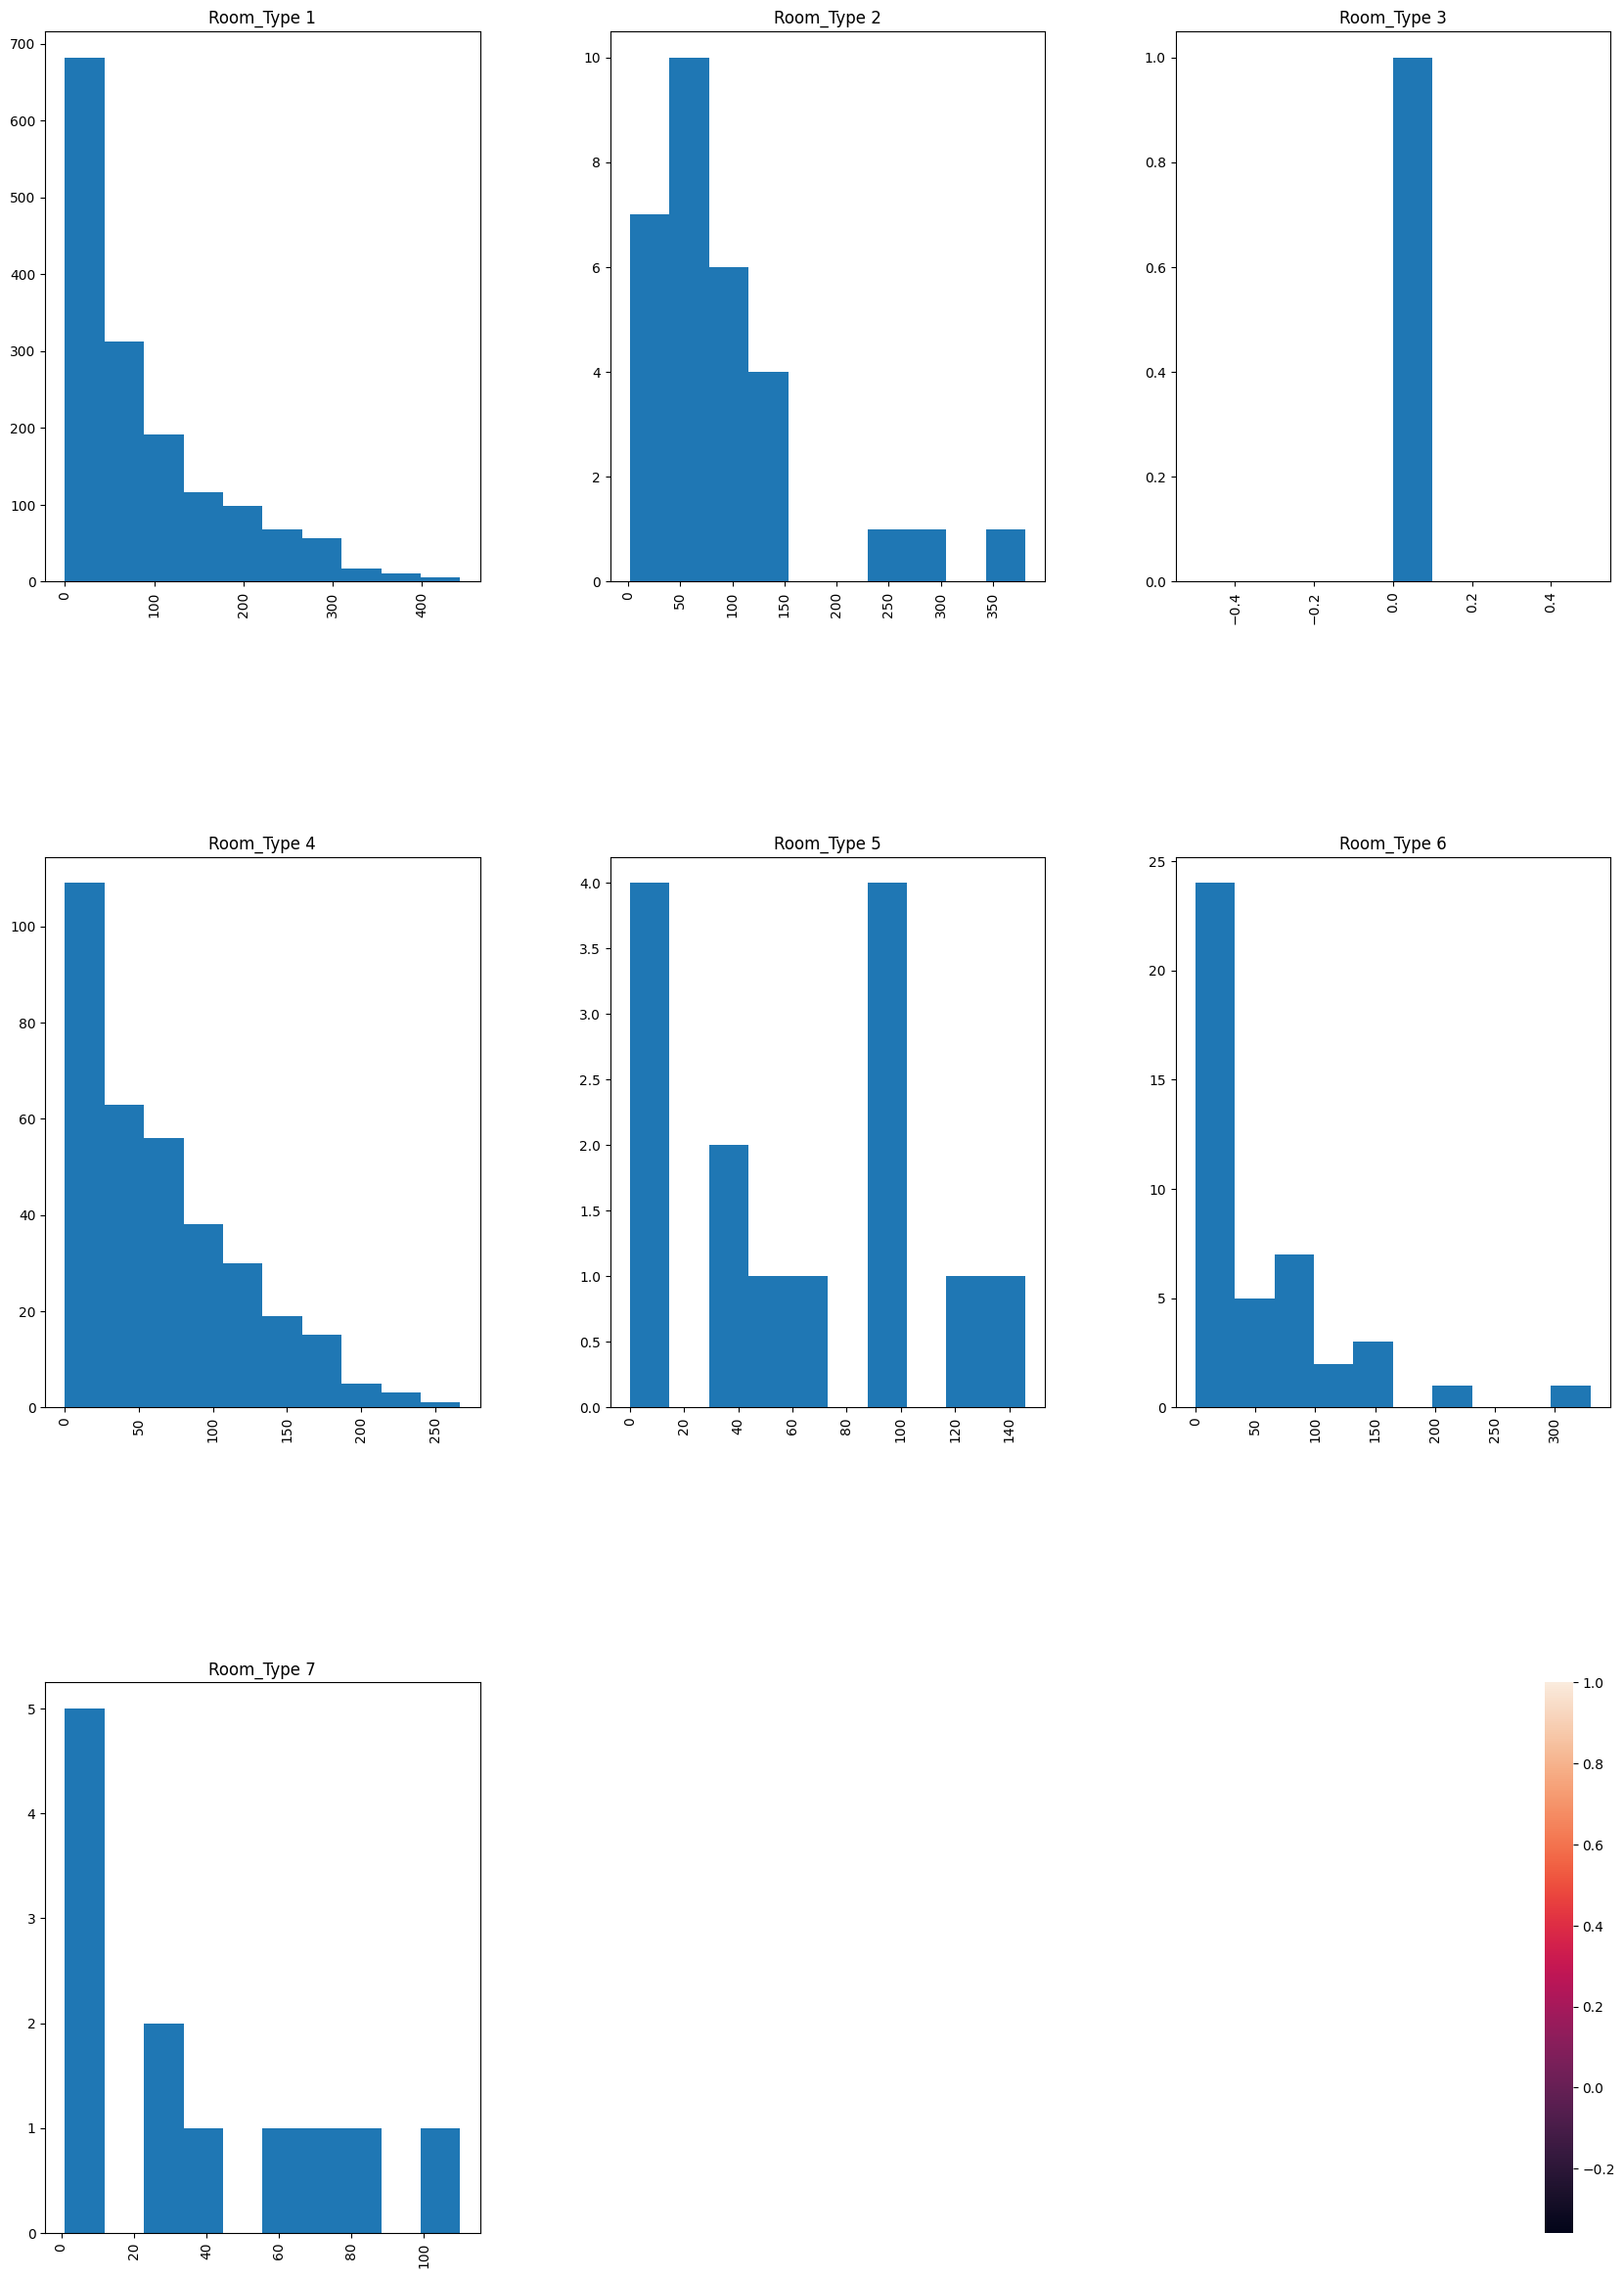

In [4]:
sns.pairplot(mydata)

mydata['arrival_date'].mean()

sns.distplot(mydata['arrival_date'])

mydata.hist(by='arrival_year',column = 'arrival_month')

mydata.hist(by='room_type_reserved',column = 'lead_time', figsize=(20,30))

corr = mydata.corr()

sns.heatmap(corr, annot=True)

In [6]:
#find mean of dataset

# mean of the dataset

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [ ]:
xbar = x.mean()
xbar

-0.7820839319883406

In [ ]:
#median of the dataset

# Median

In [ ]:
np.median(x) 

-0.009199614348304389

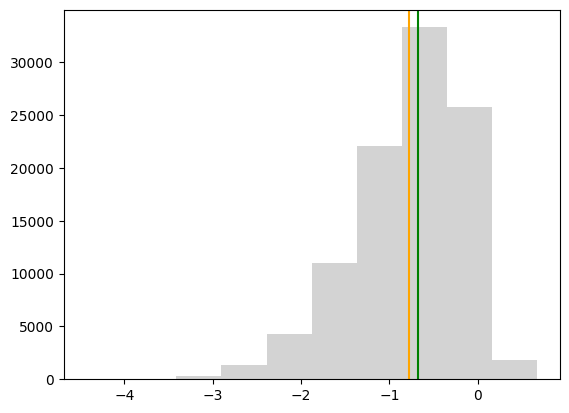

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

# variance 

basically variance is sigma^2 of standard deviation

In [ ]:
x.var()

0.38756495265593144

# Standard Deviation

In [ ]:
mydata.var()**(1/2)

0.6331891660786726

# standard error

In [ ]:
sigma = x.std()
sigma

0.6225471489420953

In [ ]:
sigma/(x.size)**(1/2)

0.0019686669415011045

In [ ]:
st.sem(x)

0.0019686767849096377

In [ ]:
st.sem(x, ddof=0)

0.0019686669415011045

In [ ]:
x=np.random.normal(size=10000)

In [ ]:
sns.set_style('ticks')

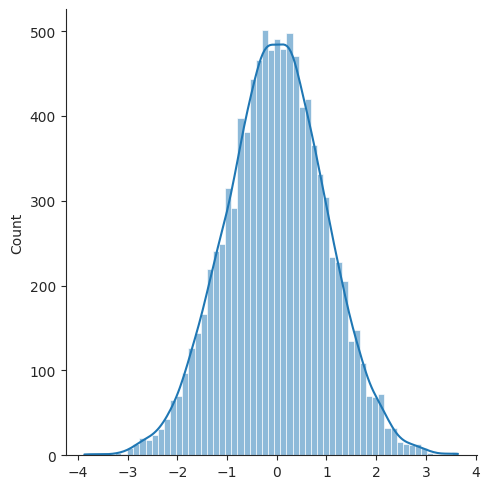

In [ ]:
_ =sns.displot(x, kde=True)

In [ ]:
x.std()

1.0052923145653383

<ipython-input-38-2c48f0eb7fcd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = mydata.corr()


<Axes: >

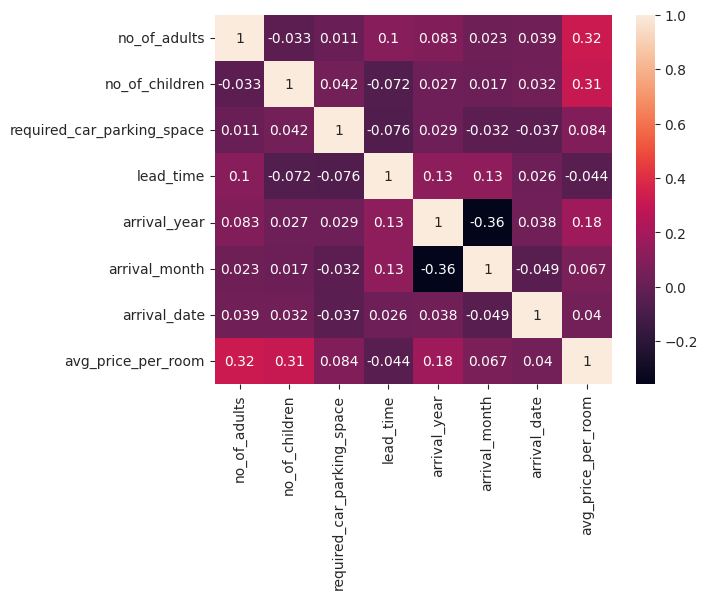

In [ ]:
corr = mydata.corr()
sns.heatmap(corr, annot=True)

In [ ]:
pd.pivot_table(mydata,index=['type_of_meal_plan'], columns=['room_type_reserved'], aggfunc=len ,fill_value=0)

Booking_ID                                      \
room_type_reserved Room_Type 1 Room_Type 2 Room_Type 3 Room_Type 4   
type_of_meal_plan                                                    
Meal Plan 1               1080          28           0         325   
Meal Plan 2                183           1           0          11   
Not Selected               297           1           1           3   

                                                       arrival_date  \
room_type_reserved Room_Type 5 Room_Type 6 Room_Type 7  Room_Type 1   
type_of_meal_plan                                                     
Meal Plan 1                 12          41          11         1080   
Meal Plan 2                  2           2           1          183   
Not Selected                 0           0           0          297   

                                            ... no_of_children              \
room_type_reserved Room_Type 2 Room_Type 3  ...    Room_Type 5 Room_Type 6   
type_of_meal_plan                           ...                              
Meal Plan 1                 28           0  ...             12          41   
Meal Plan 2                  1           0  ...              2           2   
Not Selected                 1           1  ...              0           0   

                               required_car_parking_space              \
room_type_reserved Room_Type 7                Room_Type 1 Room_Type 2   
type_of_meal_plan                                                       
Meal Plan 1                 11                       1080          28   
Meal Plan 2                  1                        183           1   
Not Selected                 0                        297           1   

                                                                                
room_type_reserved Room_Type 3 Room_Type 4 Room_Type 5 Room_Type 6 Room_Type 7  
type_of_meal_plan                                                               
Meal Plan 1                  0         325          12          41          11  
Meal Plan 2                  0          11           2           2           1  
Not Selected                 1           3           0           0           0  

[3 rows x 77 columns]

In [ ]:
mydata = st.skewnorm.rvs(-4, size=100000)
mydata[0:10]

array([-0.66221107, -1.73157578, -1.58196017, -1.6867801 , -0.50980272,
       -0.46005257, -0.34869281,  0.02870894, -0.32651543, -0.78477545])